In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
%matplotlib inline
import seaborn as sns

sns.__version__



'0.11.1'

In [214]:
pcos= pd.read_csv('PCOS-Responsesthesis.csv')

In [215]:
pcos


,Patient File No.,Age (yrs),height(cm),weight (kgs),BMI,Diabetes(Y/N),HighBP(Y/N),Weight gain(Y/N),Cycle(R/I),Cycle Durations (days),...,Pimples(Y/N),Hair loss(Y/N),Skin darkening (Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Marraige Status (Y/N),Pregnant(Y/N),Anxieties(Y/N),PCOS(Y/N),under treatment(Y/N)
0,1,24,154.94,63,26.2,0,1,1,1,3,...,1,1,1,1,1,0,0,1,1,0
1,2,23,157.48,59,23.8,0,0,0,1,3,...,0,1,0,1,1,0,0,0,0,0
2,3,24,160.02,59,23.0,1,0,0,1,3,...,1,1,0,1,1,0,0,1,0,0
3,4,23,162.56,44,16.7,0,0,0,0,4,...,1,1,0,1,1,0,0,1,0,0
4,5,22,165.10,80,29.3,1,0,1,1,3,...,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,276,23,162.56,67,25.4,0,0,1,1,5,...,1,1,0,1,1,0,0,1,1,1
276,277,34,160.02,59,23.0,0,0,0,0,2,...,1,1,1,0,1,1,1,0,0,1
277,278,25,170.18,62,21.4,0,0,1,0,2,...,1,1,1,0,0,1,1,1,0,0
278,279,21,152.40,56,24.1,0,0,0,1,4,...,1,1,0,1,1,0,0,0,0,0


In [216]:
pcos.isnull().sum()

Patient File No.             0
Age (yrs)                    0
height(cm)                   0
weight (kgs)                 0
BMI                          0
Diabetes(Y/N)                0
HighBP(Y/N)                  0
Weight gain(Y/N)             0
Cycle(R/I)                   0
Cycle Durations (days)       0
Unwanted hair growth(Y/N)    0
Pimples(Y/N)                 0
Hair loss(Y/N)               0
Skin darkening (Y/N)         0
Fast food (Y/N)              0
Reg.Exercise(Y/N)            0
Marraige Status (Y/N)        0
Pregnant(Y/N)                0
Anxieties(Y/N)               0
PCOS(Y/N)                    0
under treatment(Y/N)         0
dtype: int64

In [217]:
pcos = pcos.drop([ 'Patient File No.'], axis =1)

In [218]:
pcos

,Age (yrs),height(cm),weight (kgs),BMI,Diabetes(Y/N),HighBP(Y/N),Weight gain(Y/N),Cycle(R/I),Cycle Durations (days),Unwanted hair growth(Y/N),Pimples(Y/N),Hair loss(Y/N),Skin darkening (Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Marraige Status (Y/N),Pregnant(Y/N),Anxieties(Y/N),PCOS(Y/N),under treatment(Y/N)
0,24,154.94,63,26.2,0,1,1,1,3,1,1,1,1,1,1,0,0,1,1,0
1,23,157.48,59,23.8,0,0,0,1,3,1,0,1,0,1,1,0,0,0,0,0
2,24,160.02,59,23.0,1,0,0,1,3,0,1,1,0,1,1,0,0,1,0,0
3,23,162.56,44,16.7,0,0,0,0,4,0,1,1,0,1,1,0,0,1,0,0
4,22,165.10,80,29.3,1,0,1,1,3,1,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,23,162.56,67,25.4,0,0,1,1,5,0,1,1,0,1,1,0,0,1,1,1
276,34,160.02,59,23.0,0,0,0,0,2,1,1,1,1,0,1,1,1,0,0,1
277,25,170.18,62,21.4,0,0,1,0,2,1,1,1,1,0,0,1,1,1,0,0
278,21,152.40,56,24.1,0,0,0,1,4,0,1,1,0,1,1,0,0,0,0,0


In [219]:
target = pcos.columns[18:19].to_list()
features = pcos.columns[0:18].to_list()
print("Total number of Features:", len(features))

Total number of Features: 18


In [220]:
features

['Age (yrs)',
 'height(cm) ',
 'weight (kgs)',
 'BMI',
 'Diabetes(Y/N)',
 'HighBP(Y/N)',
 'Weight gain(Y/N)',
 'Cycle(R/I)',
 'Cycle Durations (days)  ',
 'Unwanted hair growth(Y/N)',
 'Pimples(Y/N)',
 'Hair loss(Y/N)',
 'Skin darkening (Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'Marraige Status (Y/N)',
 'Pregnant(Y/N)',
 'Anxieties(Y/N) ']

In [221]:
target

['PCOS(Y/N)']

In [222]:
pcos.dtypes

Age (yrs)                      int64
height(cm)                   float64
weight (kgs)                   int64
BMI                          float64
Diabetes(Y/N)                  int64
HighBP(Y/N)                    int64
Weight gain(Y/N)               int64
Cycle(R/I)                     int64
Cycle Durations (days)         int64
Unwanted hair growth(Y/N)      int64
Pimples(Y/N)                   int64
Hair loss(Y/N)                 int64
Skin darkening (Y/N)           int64
Fast food (Y/N)                int64
Reg.Exercise(Y/N)              int64
Marraige Status (Y/N)          int64
Pregnant(Y/N)                  int64
Anxieties(Y/N)                 int64
PCOS(Y/N)                      int64
under treatment(Y/N)           int64
dtype: object

In [223]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
num = 12
bestfeatures = SelectKBest(score_func=chi2, k=num)
fit = bestfeatures.fit(pcos[features], pcos[target])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(pcos.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score', ascending = False)
featureScores = featureScores[featureScores.Feature != target[0]]
featureScores = featureScores.reset_index(drop = True)
featureScores[:num]

,Feature,Score
0,weight (kgs),314.327905
1,BMI,188.179570
2,Age (yrs),48.378569
3,Weight gain(Y/N),22.075743
4,Marraige Status (Y/N),16.612233
5,Pregnant(Y/N),13.272180
6,HighBP(Y/N),13.007881
7,Unwanted hair growth(Y/N),8.339211
8,Skin darkening (Y/N),7.415745
9,height(cm),6.608136


In [224]:
new_features = featureScores['Feature'].to_list()
new_features = new_features[:num]

In [225]:
new_features

['weight (kgs)',
 'BMI',
 'Age (yrs)',
 'Weight gain(Y/N)',
 'Marraige Status (Y/N)',
 'Pregnant(Y/N)',
 'HighBP(Y/N)',
 'Unwanted hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'height(cm) ',
 'Cycle(R/I)',
 'Anxieties(Y/N) ']

In [226]:
X = pcos[['weight (kgs)', 'BMI', 'Age (yrs)', 'Weight gain(Y/N)', 'Marraige Status (Y/N)', 'Pregnant(Y/N)', 'HighBP(Y/N)', 'Unwanted hair growth(Y/N)', 'Skin darkening (Y/N)', 'height(cm) ', 'Cycle(R/I)', 'Anxieties(Y/N) ']]
Y = pcos['PCOS(Y/N)']

In [227]:
print(X)

     weight (kgs)   BMI  Age (yrs)  Weight gain(Y/N)  Marraige Status (Y/N)  \
0              63  26.2         24                 1                      0   
1              59  23.8         23                 0                      0   
2              59  23.0         24                 0                      0   
3              44  16.7         23                 0                      0   
4              80  29.3         22                 1                      0   
..            ...   ...        ...               ...                    ...   
275            67  25.4         23                 1                      0   
276            59  23.0         34                 0                      1   
277            62  21.4         25                 1                      1   
278            56  24.1         21                 0                      0   
279            45  17.6         26                 1                      1   

     Pregnant(Y/N)  HighBP(Y/N)  Unwanted hair grow

In [228]:
print(Y)

0      1
1      0
2      0
3      0
4      1
      ..
275    1
276    0
277    0
278    0
279    0
Name: PCOS(Y/N), Length: 280, dtype: int64


In [229]:

from sklearn.model_selection import  train_test_split

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)


In [231]:
print(X_test)

     weight (kgs)   BMI  Age (yrs)  Weight gain(Y/N)  Marraige Status (Y/N)  \
217            87  35.1         32                 0                      1   
109            74  28.0         22                 0                      0   
195            42  17.5         19                 0                      0   
215            79  35.2         33                 1                      1   
208            73  32.5         31                 1                      1   
63             54  20.4         27                 0                      1   
209            88  37.9         43                 0                      1   
262            59  24.6         31                 0                      1   
144            67  27.9         27                 1                      0   
151            55  22.2         21                 1                      0   
275            67  25.4         23                 1                      0   
36             51  22.0         33                 0

In [232]:
print(Y_test)

217    1
109    1
195    0
215    1
208    1
63     0
209    1
262    0
144    1
151    0
275    1
36     0
110    0
0      1
150    0
223    1
188    0
123    1
146    1
177    1
108    1
163    0
83     0
234    1
17     0
259    0
152    1
59     1
119    1
194    0
254    0
35     1
222    1
30     0
155    0
185    0
265    1
14     0
89     1
77     1
82     0
43     1
37     1
67     0
225    1
60     0
52     1
276    0
9      1
75     0
187    1
260    0
95     1
85     1
96     1
94     1
Name: PCOS(Y/N), dtype: int64


In [233]:
print(X.shape, X_train.shape, X_test.shape)

(280, 12) (224, 12) (56, 12)


# Model evaluation with Logistic Regression

In [234]:
from sklearn.linear_model import LogisticRegression



In [235]:
model = LogisticRegression(solver='liblinear')

In [236]:
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [237]:
from sklearn.metrics import accuracy_score



In [238]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [239]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9866071428571429


In [240]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [241]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8571428571428571


# Building a Predictive System

In [242]:
input_data = (63,26.2,24,1,0,0,1,1,1,154.94,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have PCOS')
else:
  print('The Person has PCOS')

[1]
The Person has PCOS


# Model evaluation with Random forest

In [243]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

In [244]:
from sklearn.metrics import accuracy_score
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  1.0


In [245]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9642857142857143


In [246]:
input_data = (63,26.2,24,1,0,0,1,1,1,154.94,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have PCOS')
else:
  print('The Person has PCOS')

[1]
The Person has PCOS


# Model evaluation with KNN

In [247]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)


KNeighborsClassifier()

In [248]:
from sklearn.metrics import accuracy_score
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.9732142857142857


In [249]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9285714285714286


In [250]:
input_data = (63,26.2,24,1,0,0,1,1,1,154.94,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have PCOS')
else:
  print('The Person has PCOS')

[1]
The Person has PCOS


# Model evaluation with Gaussian Naive Bayes

In [251]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train, Y_train)


GaussianNB()

In [252]:
from sklearn.metrics import accuracy_score
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.90625


In [253]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7321428571428571


In [254]:
input_data = (63,26.2,24,1,0,0,1,1,1,154.94,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have PCOS')
else:
  print('The Person has PCOS')

[1]
The Person has PCOS


# Model evaluation with Linear SVM

In [255]:
from sklearn import svm
model= svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [256]:
from sklearn.metrics import accuracy_score
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.9866071428571429


In [257]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9107142857142857


In [258]:
input_data = (63,26.2,24,1,0,0,1,1,1,154.94,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have PCOS')
else:
  print('The Person has PCOS')

[1]
The Person has PCOS


# Model evaluation with Radial SVM

In [259]:
from sklearn import svm
model= svm.SVC(kernel='rbf')
model.fit(X_train, Y_train)

SVC()

In [260]:
from sklearn.metrics import accuracy_score
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.9151785714285714


In [261]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9107142857142857


In [262]:
input_data = (63,26.2,24,1,0,0,1,1,1,154.94,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have PCOS')
else:
  print('The Person has PCOS')

[1]
The Person has PCOS


In [263]:
from sklearn import metrics

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [265]:
#model=SVC(random_state=42, C=1.0, kernel='rbf', degree=3)
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)
KN_model = KNeighborsClassifier()
SVML_model = svm.SVC(kernel='linear')
SVMR_model= svm.SVC(kernel='rbf')
GB_model = GaussianNB()
RF_model = RandomForestClassifier()

In [266]:
LR_model.fit(X_train,Y_train)
KN_model.fit(X_train,Y_train)
SVML_model.fit(X_train,Y_train)
SVMR_model.fit(X_train,Y_train)
GB_model.fit(X_train,Y_train)
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

In [267]:
LR_model.score(X_train,Y_train)

0.9866071428571429

In [268]:
KN_model.score(X_train,Y_train)

0.9732142857142857

In [269]:
SVML_model.score(X_train,Y_train)

0.9866071428571429

In [270]:
SVMR_model.score(X_train,Y_train)

0.9151785714285714

In [271]:
GB_model.score(X_train,Y_train)

0.90625

In [272]:
RF_model.score(X_train,Y_train)

1.0

In [273]:
#These are predictions
LR_pred = LR_model.predict(X_test)
KN_pred = KN_model.predict(X_test)
SVML_pred = SVML_model.predict(X_test)
SVMR_pred = SVMR_model.predict(X_test)
GB_pred = GB_model.predict(X_test)
RF_pred = RF_model.predict(X_test)



In [274]:
print(LR_pred, '\n')
print(KN_pred, '\n')
print(SVML_pred, '\n')
print(SVMR_pred, '\n')
print(GB_pred, '\n')
print(RF_pred, '\n')


[1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1] 

[1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1] 

[1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1] 

[1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1] 

[1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1] 

[1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1] 



In [275]:
from sklearn.metrics import confusion_matrix
LR_cm = confusion_matrix(Y_test, LR_pred)
KN_cm = confusion_matrix(Y_test, KN_pred)
SVML_cm = confusion_matrix(Y_test, SVML_pred)
SVMR_cm = confusion_matrix(Y_test, SVMR_pred)
GB_cm = confusion_matrix(Y_test, GB_pred)
RF_cm = confusion_matrix(Y_test, RF_pred)

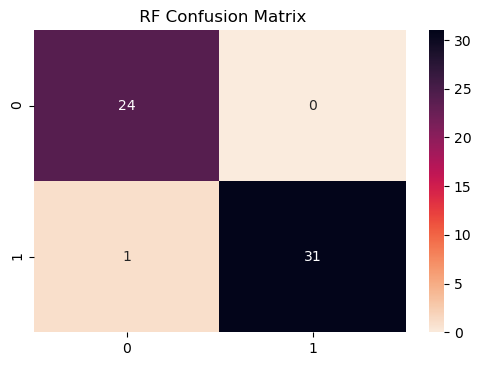

In [276]:
from sklearn.metrics import confusion_matrix
RF_model= RandomForestClassifier(n_estimators=200, random_state=1)
RF_model.fit(X_train,Y_train)
RF_pred = RF_model.predict(X_test)

plt.figure(dpi = 100)
plt.title(" RF Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(Y_test), RF_pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

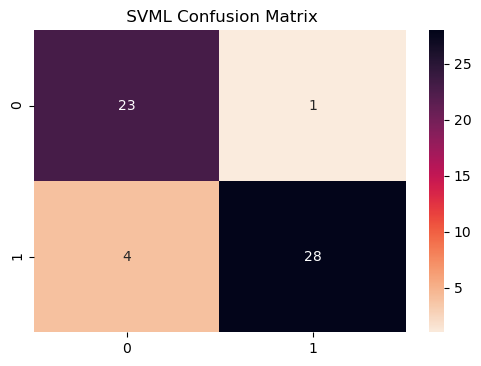

In [277]:
from sklearn.metrics import confusion_matrix
SVML_model = svm.SVC(kernel='linear')
SVML_model.fit(X_train,Y_train)
SVML_pred = SVML_model.predict(X_test)
plt.figure(dpi = 100)
plt.title(" SVML Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(Y_test), SVML_pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

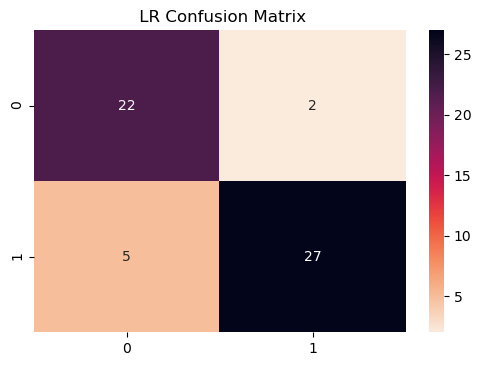

In [278]:
from sklearn.metrics import confusion_matrix
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_model.fit(X_train,Y_train)
LR_pred = LR_model.predict(X_test)

plt.figure(dpi = 100)
plt.title(" LR Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(Y_test), LR_pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

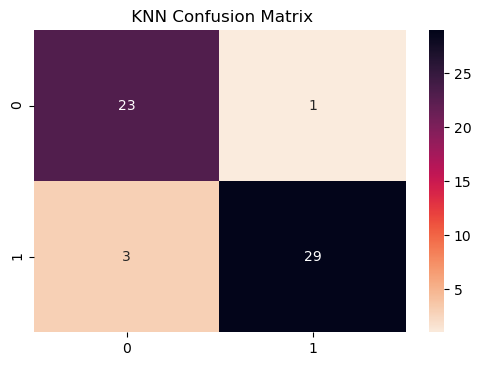

In [279]:
from sklearn.metrics import confusion_matrix
KN_model = KNeighborsClassifier()
KN_model.fit(X_train,Y_train)
KN_pred = KN_model.predict(X_test)

plt.figure(dpi = 100)
plt.title(" KNN Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(Y_test), KN_pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

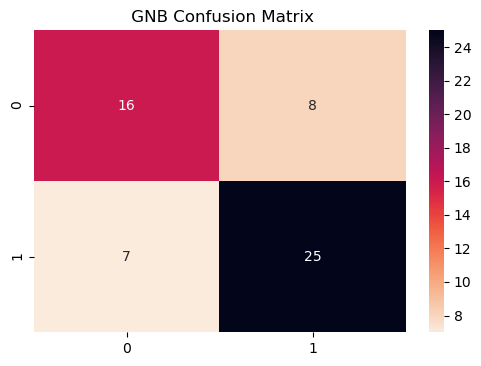

In [280]:
from sklearn.metrics import confusion_matrix
GB_model = GaussianNB()
GB_model.fit(X_train,Y_train)
GB_pred = GB_model.predict(X_test)

plt.figure(dpi = 100)
plt.title(" GNB Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(Y_test), GB_pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

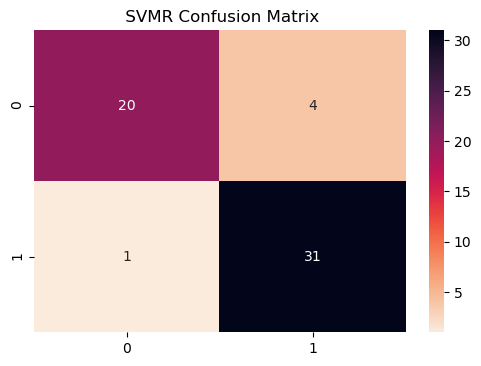

In [281]:
from sklearn.metrics import confusion_matrix
SVMR_model = svm.SVC(kernel='rbf')
SVMR_model.fit(X_train,Y_train)
SVMR_pred = SVMR_model.predict(X_test)

plt.figure(dpi = 100)
plt.title(" SVMR Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(Y_test), SVMR_pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

In [282]:
print(LR_cm, '\n')
print(KN_cm, '\n')
print(SVML_cm, '\n')
print(SVMR_cm, '\n')
print(GB_cm, '\n')
print(RF_cm, '\n')


[[22  2]
 [ 5 27]] 

[[23  1]
 [ 3 29]] 

[[23  1]
 [ 4 28]] 

[[20  4]
 [ 1 31]] 

[[16  8]
 [ 7 25]] 

[[24  0]
 [ 1 31]] 



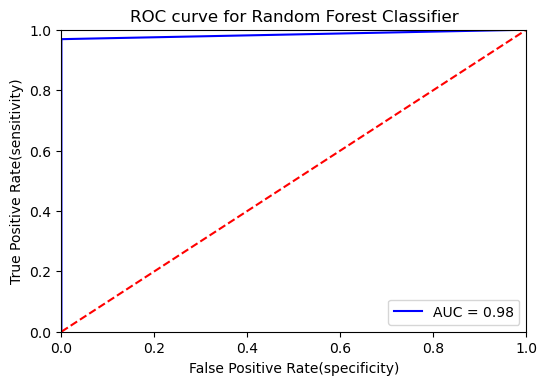

In [283]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test, RF_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()

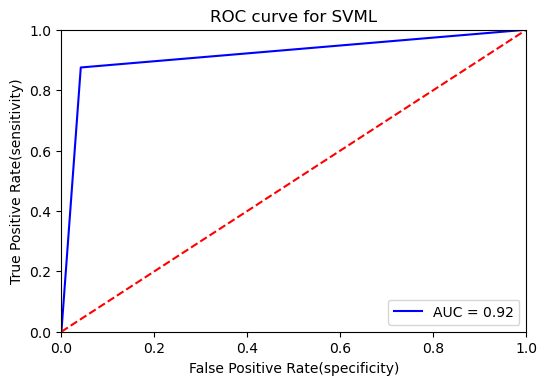

In [284]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(Y_test, SVML_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for SVML')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()

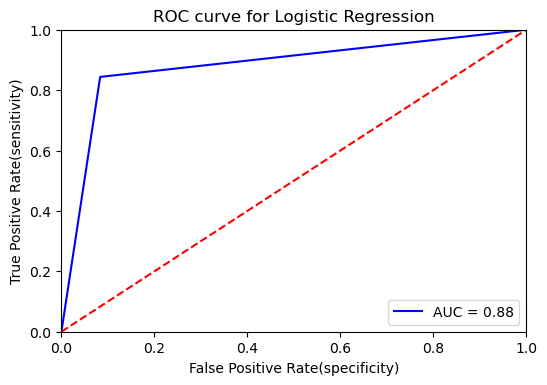

In [285]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(Y_test, LR_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()

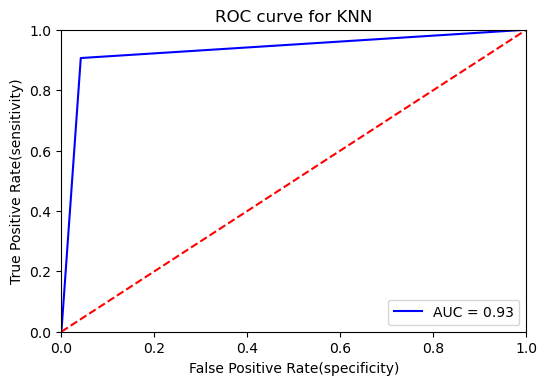

In [286]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(Y_test, KN_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()

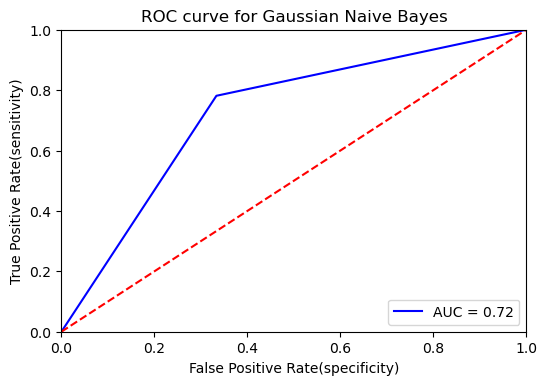

In [287]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(Y_test, GB_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Gaussian Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()

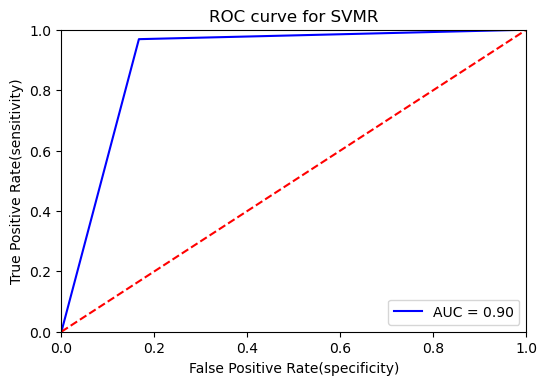

In [288]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(Y_test, SVMR_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for SVMR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()